## **Carateristicas de las señales**

Vamos a obtener 3 carateristicas de las señales, las cuales son 7 en total:



1.   GSR
2.   BLOOD VOLUMEN PRESSURE
3.   RESPIRATION PATTERN
4.   SKIN TEMPERATURE
5.   EMG
6.   EOG
7.   EEG



In [1]:
# Librerias
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import librosa

- Vamos a cargar la base de datos que se encuentra en Google Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/My Drive/Datos_señalesIIi/' #ruta de la base de datos
fileName = 's17.mat' #nombre de la base de datos
db = sio.loadmat(ruta+fileName) #variable donde guardaremos la base de datos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
X = db['data'] #Guardar en X los datos 
print('forma de la matriz: '+str(X.shape)) #miramos el tamaño y las dimensiones de la base de datos

print('Videos: ' +str(X.shape[0]))
print('Canales: ' +str(X.shape[1]))
print('Muestras de la señal: ' +str(X.shape[2]))

forma de la matriz: (40, 40, 6528)
Videos: 40
Canales: 40
Muestras de la señal: 6528


# **GSR** 

La respuesta galvánica de la piel (GSR), también denominada actividad electrodérmica (EDA) y conductancia de la piel (SC), es la medida de las continuas variaciones en las características eléctricas de la piel, por ejemplo la conductancia, causada por la variación de la sudoración del cuerpo humano.

Referencia: https://www.brainsigns.com/es/science/s2/technologies/gsr
Copyright © BrainSigns

# Graficamos las 40 señales 

La señal GSR esta en el canal 37.

In [4]:
#funcion para graficar las 40 señales
def graficar_señales(canal):
  canal=canal-1 #le resto uno al canal porque python crea listas con la primera ubicacion igual a 0
  
  for video in range(40): #ciclo que recorre todos los videos

    señal = X[video,canal,:] #variable de la señal GSR
    ts = len(señal)/128. #tiempo de muestreo
    tiempo = np.linspace(0,ts,len(señal)) #tiempo
    
    plt.plot(tiempo,señal) 
    plt.title('Video '+  str(video+1))
    plt.ylabel('uV')
    plt.xlabel('s')
    plt.grid()
    plt.show()
    


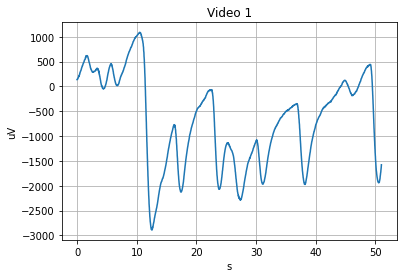

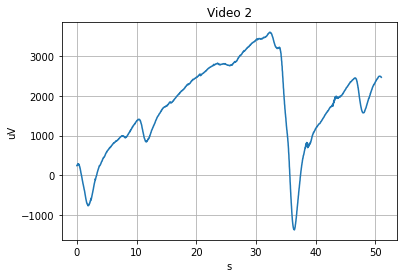

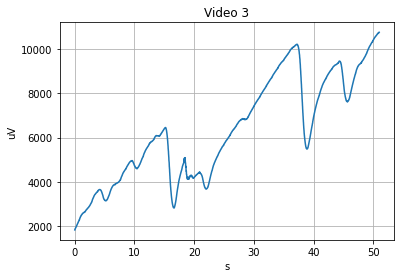

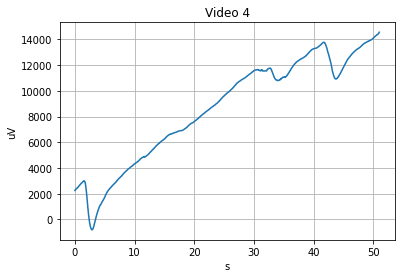

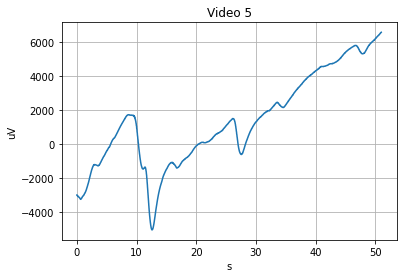

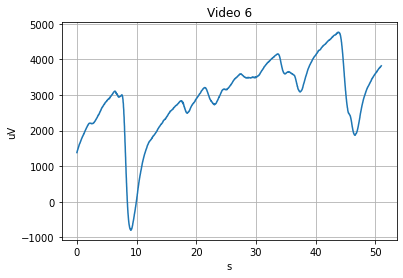

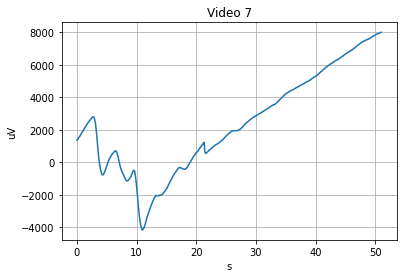

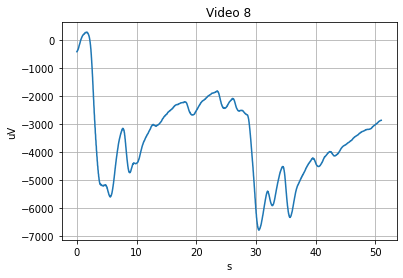

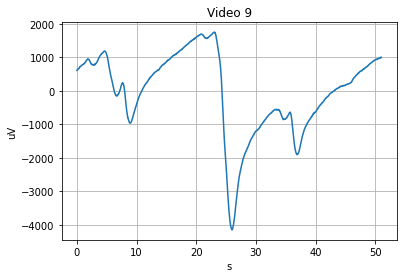

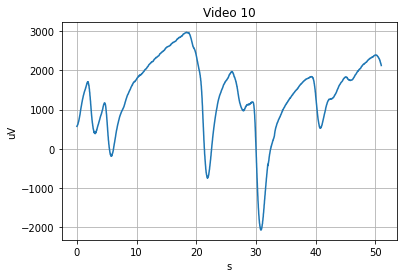

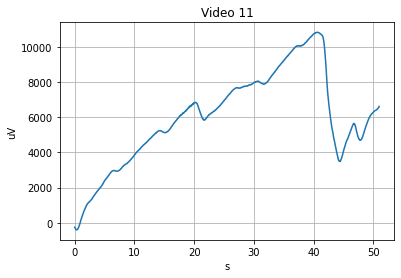

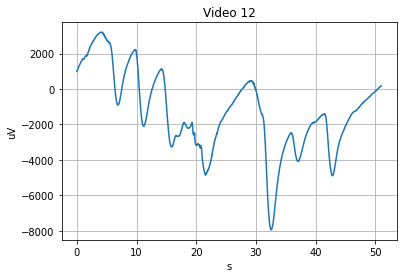

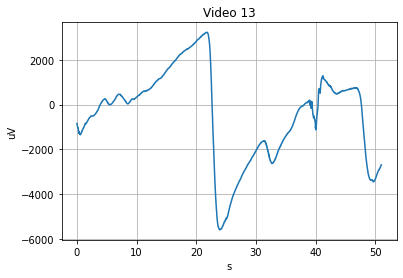

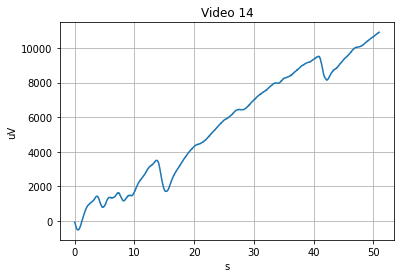

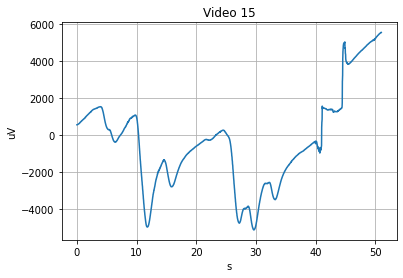

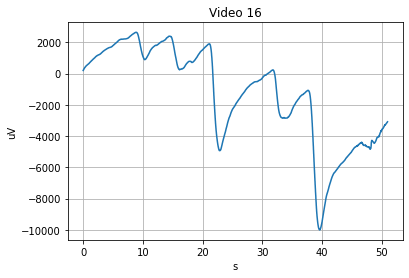

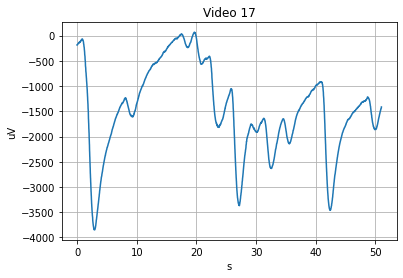

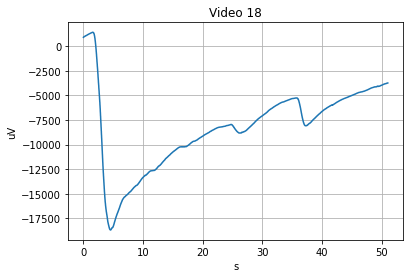

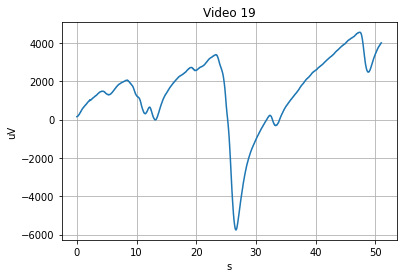

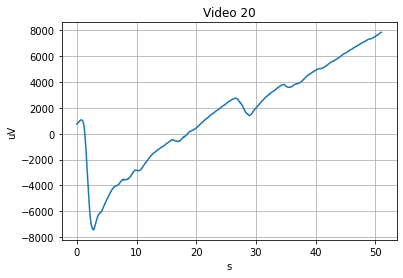

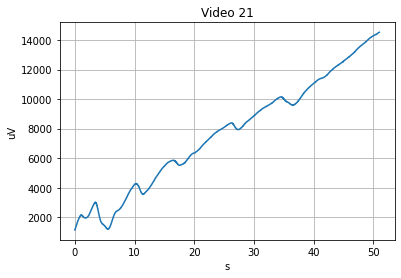

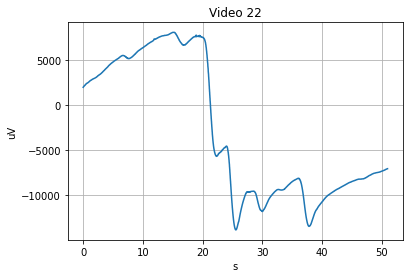

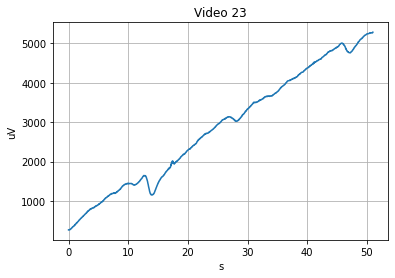

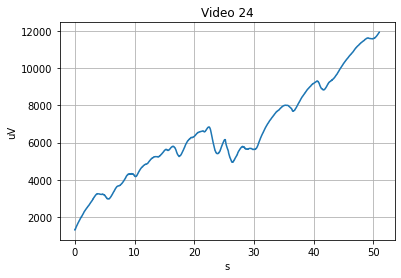

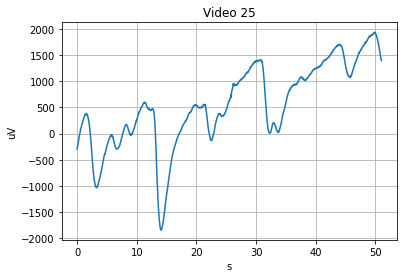

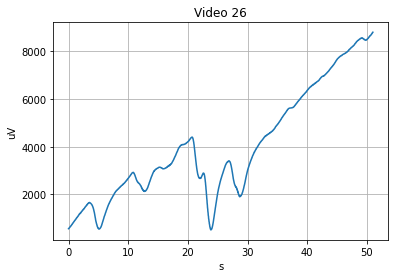

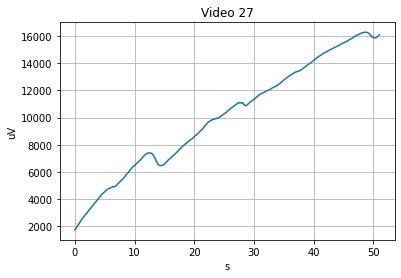

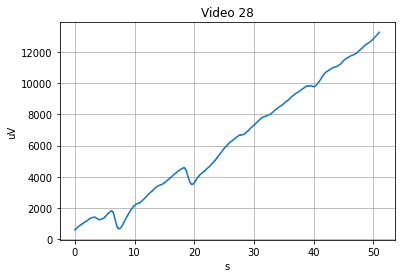

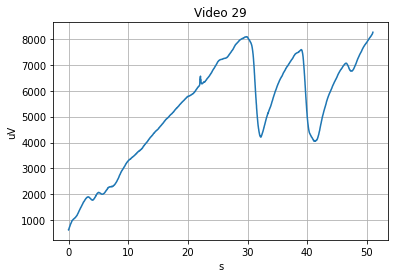

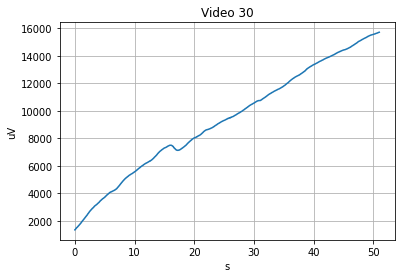

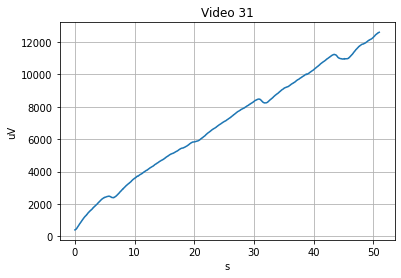

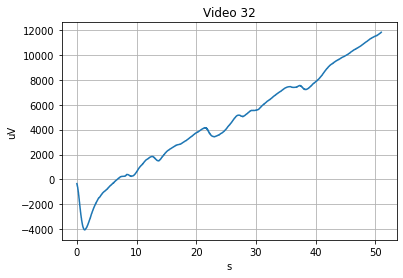

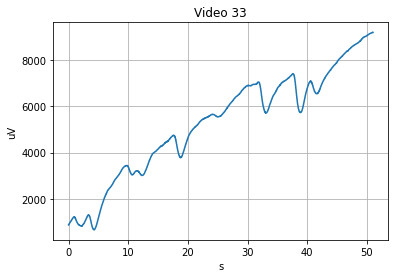

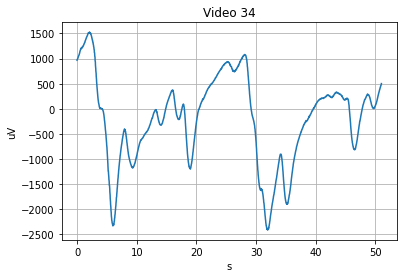

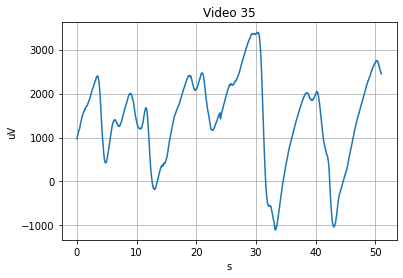

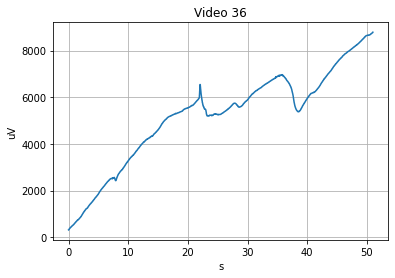

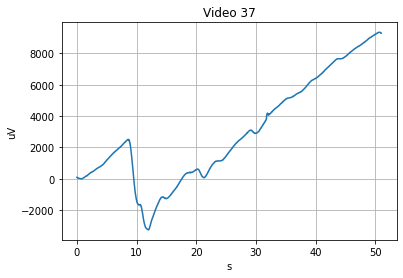

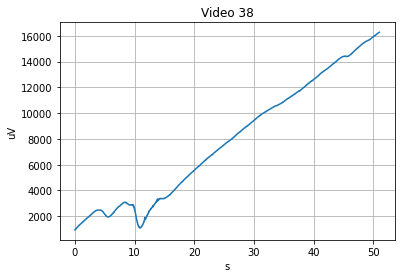

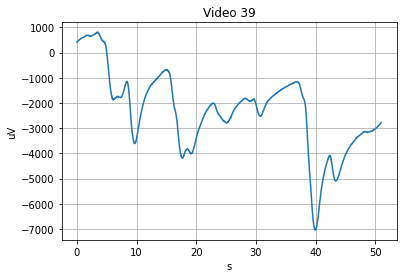

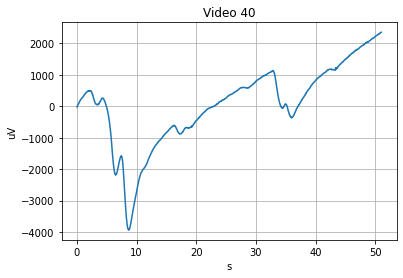

In [5]:
canal_GSR=37 #canal señal GSR
graficar_señales(canal_GSR)

Las caracteristicas más importantes de las señales GSR son:


*   resistencia promedio de la piel
*   promedio de los derivados
*   promedio del derivado para valores negativos solamente (tasa de disminución promedio durante el tiempo de decaimiento)
*   proporción de muestras negativas en el derivado vs. todas las muestras
*   número de mínimos locales en la señal GSR 
*   tiempo medio de aumento de la señal de GSR
*   10 potencias espectrales en las bandas de [0-2,4]Hz

solo vamos a calcular 3 los cuales son: **resistencia promedio de la piel**, **promedio de los derivados** y **numero de mínimos locales en la señal GSR**.

###1) resistencia promedio de la piel


In [6]:
#funcion que devuelve el promedio de las 40 señales
def promedio_señales(canal):
  promedio_señal=[] #lista para guardar los promedios 
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal GSR
    promedio_señal.append(np.average(señal))# calculo del promedio de la señal
  
  return(promedio_señal)

In [7]:
promedio_GSR=[]
promedio_GSR=promedio_señales(canal_GSR)

print('Promedio de la resistencia de la piel: '+'\n')

for i in range(40):
  print('Video'+str(i+1)+': '+str(promedio_GSR[i]))

print('\n')
print('Promedio total: '+str(np.average(promedio_GSR)))

Promedio de la resistencia de la piel: 

Video1: -674.1595272748897
Video2: 1735.8361033493647
Video3: 6349.812806984382
Video4: 8631.950849587727
Video5: 1366.02438254009
Video6: 2933.2735958431904
Video7: 2381.5558997350054
Video8: -3537.25321197874
Video9: -29.33466912525696
Video10: 1387.0363570646784
Video11: 5983.203755739719
Video12: -1290.0401701852222
Video13: -439.65820622537643
Video14: 5560.670488273485
Video15: -327.8920992539069
Video16: -1328.667518670262
Video17: -1460.5234656934365
Video18: -8277.331329026807
Video19: 1458.7403314177943
Video20: 1479.2144276599706
Video21: 7678.021090908
Video22: -2856.332033375716
Video23: 2861.8931753411707
Video24: 6562.218388344914
Video25: 553.7634198767146
Video26: 4020.3371593415445
Video27: 10118.613399482083
Video28: 6244.86790793691
Video29: 5244.134935021332
Video30: 9367.039939901628
Video31: 6983.57211019065
Video32: 4621.668684377766
Video33: 5264.139247167675
Video34: -201.37678133392546
Video35: 1403.4920076177941
Video

###2) Promedio de la derivada.

In [8]:
#funcion que devuelve el promedio derivado de las 40 señales
def promedioDiff_señales(canal):
  promedioDiff_señal=[] #lista para guardar los promedios 
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    promedioDiff_señal.append(np.average(np.diff(señal)))# calculo del promedio de la señal
  
  return(promedioDiff_señal)

In [9]:
#calculo del promedio derivado
promedioDiff_GSR=promedioDiff_señales(canal_GSR)

print('Promedio de la derivada: '+'\n')
for i in range(40):
  print('Video'+str(i+1)+': '+str(promedioDiff_GSR[i]))

print('\n')
print('Promedio Total de la derivada: '+ str(np.average(promedioDiff_GSR)))

Promedio de la derivada: 

Video1: -0.262750437627014
Video2: 0.33994005835113866
Video3: 1.3717290287630775
Video4: 1.8853779629552658
Video5: 1.4664677127750567
Video6: 0.3734257027337028
Video7: 1.0179924051398197
Video8: -0.3747079803879879
Video9: 0.0593662269036031
Video10: 0.23733029397510913
Video11: 1.0535734372360082
Video12: -0.12466942943816162
Video13: -0.2824114046190585
Video14: 1.6827851070832198
Video15: 0.7674076106477022
Video16: -0.5031501890189091
Video17: -0.188179368654143
Video18: -0.7119754624194174
Video19: 0.5907812429019987
Video20: 1.0859447103088726
Video21: 2.050398407338866
Video22: -1.3868958075379292
Video23: 0.7675448633939342
Video24: 1.6283157525798142
Video25: 0.25843346409891954
Video26: 1.2605081789966284
Video27: 2.20642727199952
Video28: 1.9392517078689684
Video29: 1.1674043572758501
Video30: 2.2024105465663575
Video31: 1.8698941856201214
Video32: 1.8606214759162156
Video33: 1.273340695095821
Video34: -0.07130194793546459
Video35: 0.22635912764

### 3) numero de mínimos locales.

In [10]:
#prueba de programa para los minimos locales no muestra nada (ignorar)
video=20
canal=37
señal = X[video,canal-1,:] #variable de la señal GSR
ts = len(señal)/128. #tiempo de muestreo
tiempo = np.linspace(0,ts,len(señal)) #tiempo
tiempo = np.linspace(0,ts,len(señal)) #tiempo
sort_idx = np.argsort(tiempo)
y=señal[sort_idx] #ordenar la señal
x=tiempo[sort_idx] #ordenar el tiempo
minm=np.array([],dtype=int)
maxm=np.array([],dtype=int)
length = y.size
i=0
while i < length-1:
       if i < length - 1:
           while i < length-1 and y[i+1] >= y[i]:
               i+=1

           if i != 0 and i < length-1:
               maxm = np.append(maxm,i)
           i+=1
       if i < length - 1:
           while i < length-1 and y[i+1] <= y[i]:
               i+=1
           if i < length-1:
               minm = np.append(minm,i)
           i+=1
min=[]
min=minm
v_min=[]
p=0
n=0
for i in range(len(min)-1):
  v_min.append(señal[min[i]])
minm_local=[]
for i in range(len(v_min)-1):
  if (np.abs(v_min[i]-v_min[p])>30):
    n=n+1
    p=i
    minm_local.append(v_min[p])
#print(minm_local)
final=[]
for i in range(len(minm_local)-2):
  if (minm_local[i+1]<minm_local[i] and minm_local[i+1]<minm_local[i+2]):
    final.append(minm_local[i+1])
#plt.figure(figsize=[10,5])
#plt.plot(señal)
#plt.grid()
#plt.show()

#plt.figure(figsize=[10,5])
#plt.plot(v_min,'.')
#plt.grid()
#plt.show()

#plt.figure(figsize=[10,5])
#plt.plot(minm_local,'.')
#plt.grid()
#plt.show()


#plt.figure(figsize=[10,5])
#plt.plot(final,'.')
#plt.grid()
#plt.show()

#for i in range(len(final)-1):
#  print(np.where(GSR==final[i]))

# print(final)

In [11]:
#funcion para numeros calcular los minimos locales
def minimos_locales(señal): #definicion de la función
  tiempo = np.linspace(0,ts,len(señal)) #tiempo
  sort_idx = np.argsort(tiempo)
  y=señal[sort_idx] #ordenar la señal
  x=tiempo[sort_idx] #ordenar el tiempo
  minm=np.array([],dtype=int) #arreglo para guardar la posicion de los minimos
  length = y.size #tamaño de la señal
  i=0 #guardian de ciclo
  while i < length-1: 
        if i < length - 1:
            while i < length-1 and y[i+1] <= y[i]:
                i+=1
            if i < length-1:
                minm = np.append(minm,i)
            i+=1
  min=[] #lista
  min=minm #guardar arreglo de las posiciones de los valores minimos en una lista
  v_min=[] #lista para guardar el valor minimo



  for i in range(len(min)-1): #ciclo para guardar el valor minimo con la posicion que obtuvimos antes
    v_min.append(GSR[min[i]]) #guardar el valor

  p=0 #posicion
  minm_local=[] #variable para reducir la cantidad de numeros minimos que arroja
  for i in range(len(v_min)-1): #ciclo que recorre toda la lista de valores minimos 
    if (np.abs(v_min[i]-v_min[p])>30): #condicion que pregunta si la diferencia de un valor al siguiente
      minm_local.append(v_min[p]) #guarda un solo valor
      p=i #actualizar nuevo valor minimo

  final=[] #lista final para guardar la cantidad y los valores minimos locales
  for i in range(len(minm_local)-2): #ciclo que recorre la lsita reducidad
    if (minm_local[i+1]<minm_local[i] and minm_local[i+1]<minm_local[i+2]): #condicion que pregunta de esos valores reducidos cual es un minimo local
      final.append(minm_local[i+1]) #agregar esos minimos locales a la lista final

  for i in range(len(final)-1): #ciclo que busca las posiciones de los minimos locales
  #esto se hace para corroborar que efectivamente esos valores si sean minimos
    np.where(GSR==final[i]) #buscar el valor final[i] en la señal y devuelve la posicion

  return(len(final)) #retorna la cantidad de minimos locales

In [12]:
print('Minimos locales:'+'\n')

for video in range(40): #ciclo para tomar todos los videos
  GSR = X[video,canal_GSR-1,:] #variable de la señal GSR en le video especifico
  minimos_locales(GSR) #calcular la cantidad de minimos locales
  print('VIDEO '+str(video+1)+': '+str(minimos_locales(GSR)))

Minimos locales:

VIDEO 1: 11
VIDEO 2: 6
VIDEO 3: 8
VIDEO 4: 5
VIDEO 5: 8
VIDEO 6: 8
VIDEO 7: 5
VIDEO 8: 10
VIDEO 9: 7
VIDEO 10: 7
VIDEO 11: 5
VIDEO 12: 11
VIDEO 13: 11
VIDEO 14: 4
VIDEO 15: 11
VIDEO 16: 8
VIDEO 17: 11
VIDEO 18: 3
VIDEO 19: 7
VIDEO 20: 4
VIDEO 21: 6
VIDEO 22: 8
VIDEO 23: 5
VIDEO 24: 12
VIDEO 25: 11
VIDEO 26: 7
VIDEO 27: 3
VIDEO 28: 4
VIDEO 29: 6
VIDEO 30: 1
VIDEO 31: 3
VIDEO 32: 6
VIDEO 33: 9
VIDEO 34: 12
VIDEO 35: 10
VIDEO 36: 4
VIDEO 37: 6
VIDEO 38: 2
VIDEO 39: 11
VIDEO 40: 6


# **Blood volume pressure** 

La pletismografía incluye aquellas técnicas que miden cambios de volumen
como consecuencia de variaciones del flujo sanguíneo. No son métodos
específicos de un solo vaso arterial sino que miden cambios de volumen en
un segmento de la extremidad. 

Referencia: http://www.cdvni.org/certificacion/guia5pletismografia.pdf

# Graficamos las 40 señales 

La señal BVP esta en el canal 39.

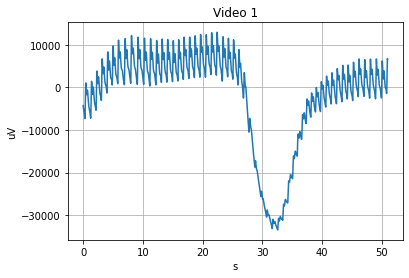

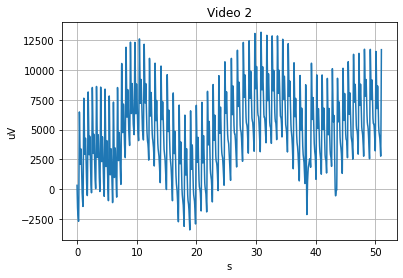

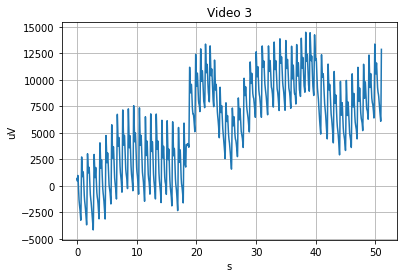

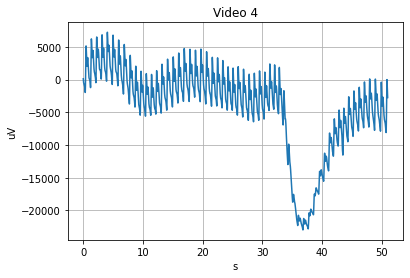

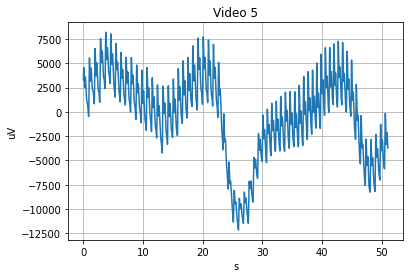

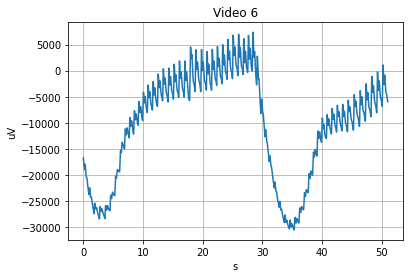

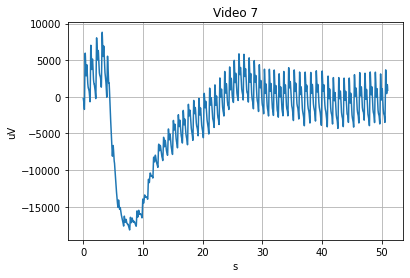

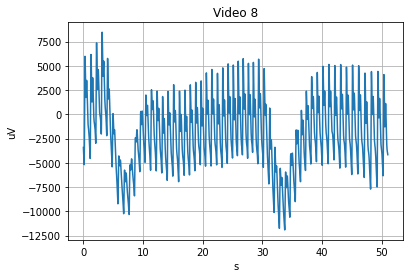

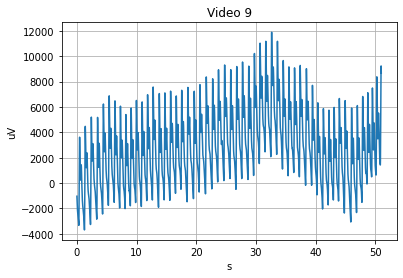

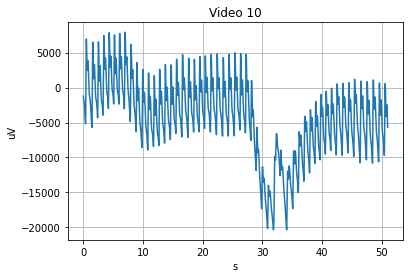

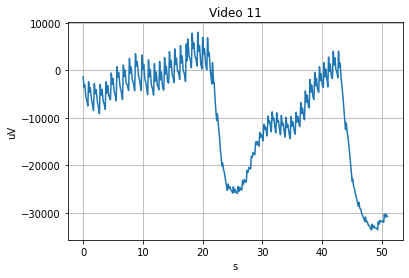

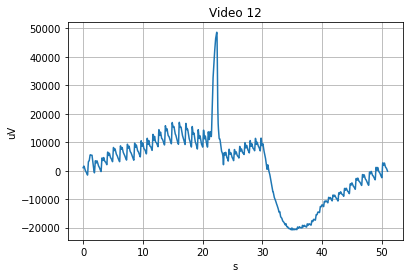

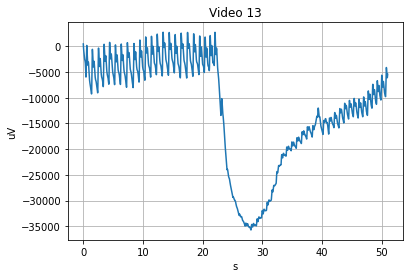

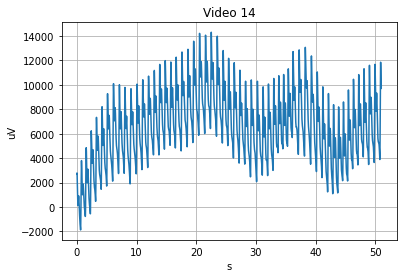

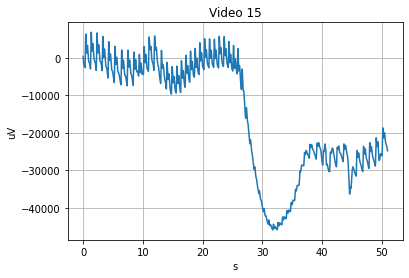

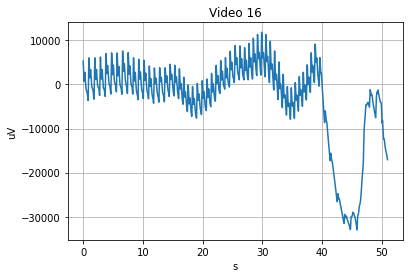

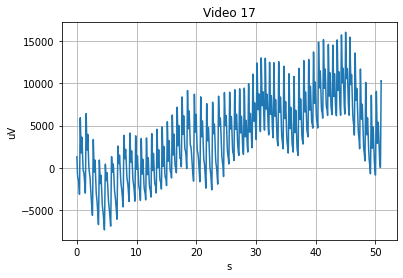

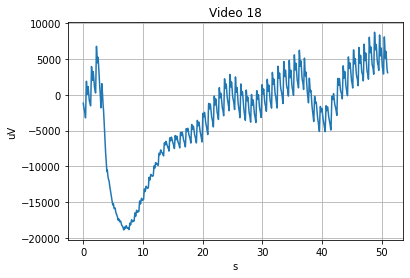

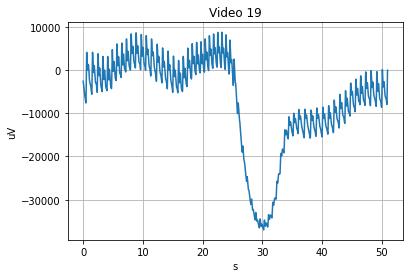

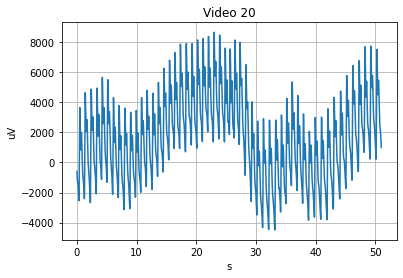

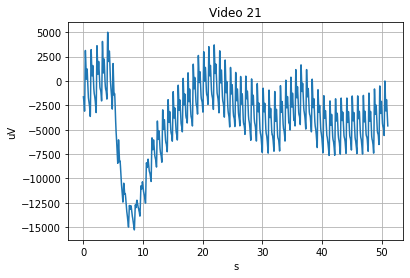

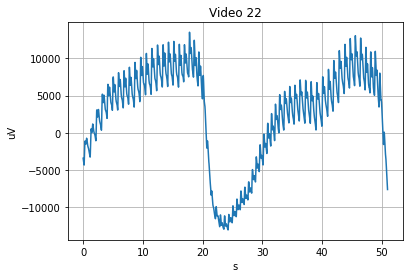

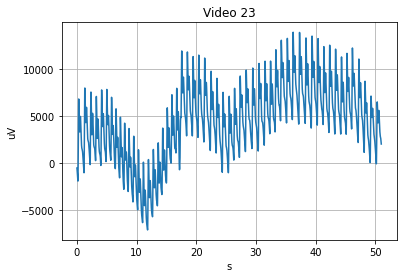

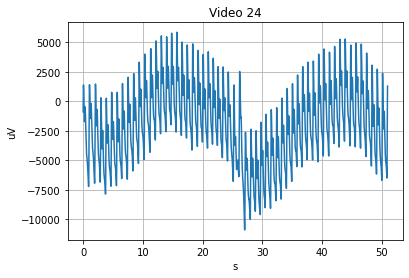

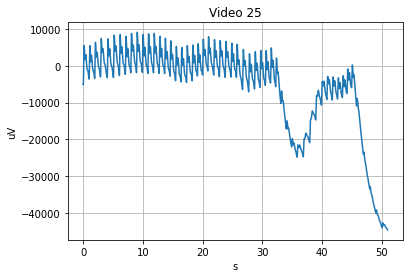

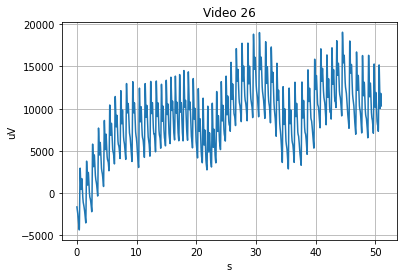

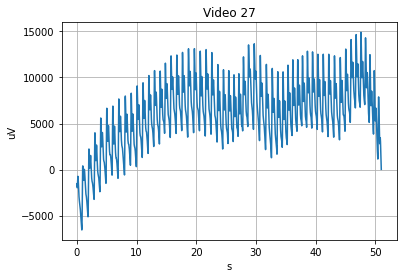

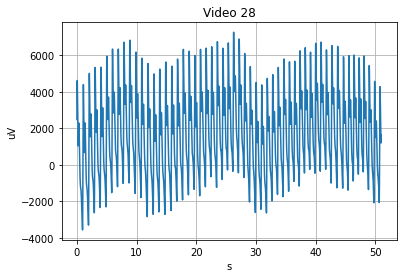

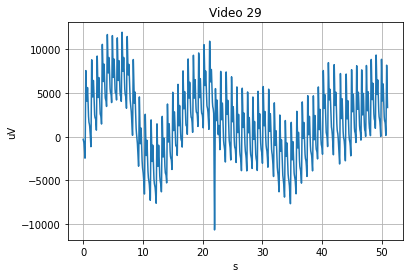

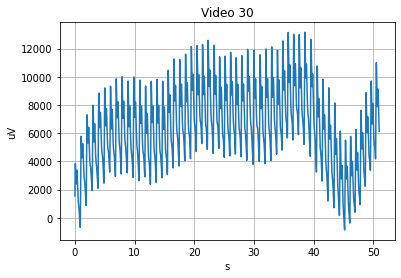

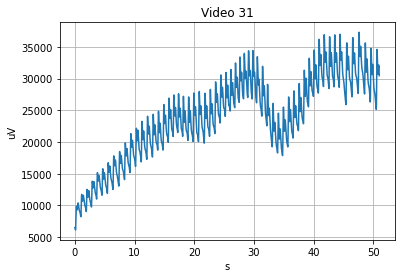

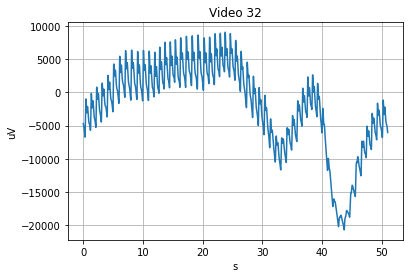

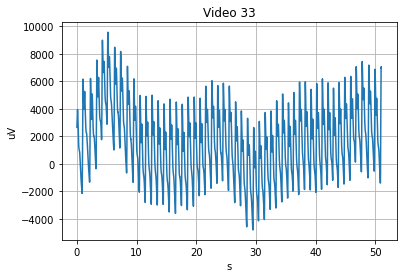

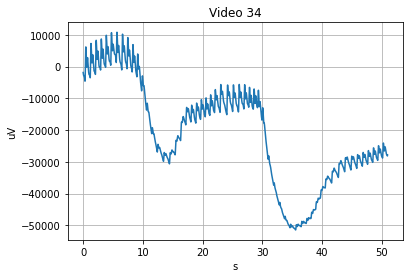

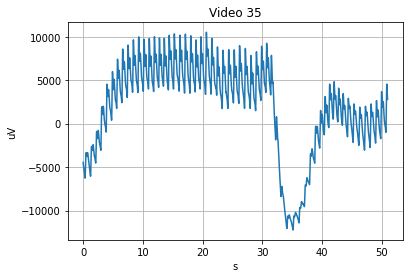

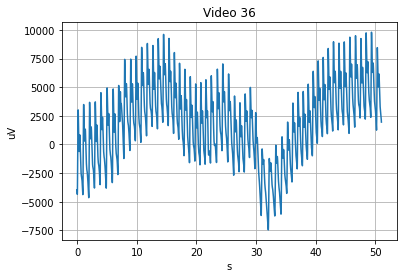

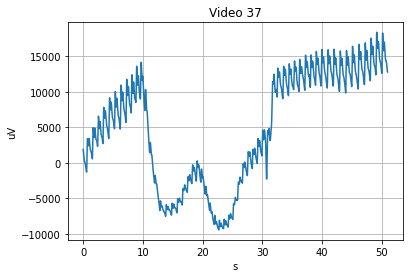

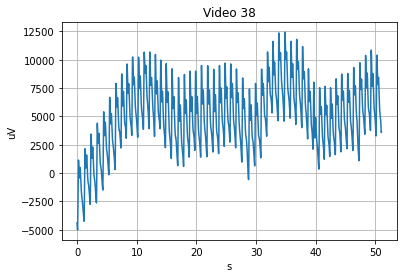

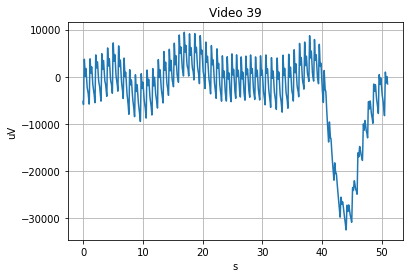

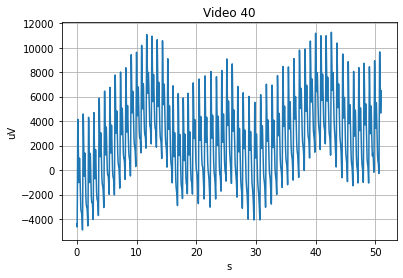

In [13]:
canal_BVP=39
graficar_señales(canal_BVP)

Las caracteristicas más importantes de las señales BVP son:


*   El promedio y la desviación estándar de la HR, HRV, e intervalos de latidos.


+   relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.

*   potencia espectral en las bandas ([0,1-0,2]Hz, [0,2-0,3]Hz, [0,3-0,4]Hz), componentes de baja frecuencia [0,01-0,08]Hz, media frecuencia [0,08-0,15]Hz y alta frecuencia [0,15-0,5]Hz del espectro de potencia de la HRV.

solo vamos a calcular 3 los cuales son: **El promedio HR**, **La desviación estándar de HR**, y **relación de energía entre las bandas de frecuencia [0,04-0,15]Hz y [0,15-0,5]Hz.**.

### 1) Promedio HR

In [14]:
promedio_señales(canal_BVP)
print('Promedio HR'+'\n')
for i in range(len(promedio_señales(canal_BVP))):
  print('Video '+str(i+1)+': '+str(promedio_señales(canal_BVP)[i]))

Promedio HR

Video 1: -1668.324413381304
Video 2: 4934.723291846259
Video 3: 5993.601785009276
Video 4: -4088.6126625549155
Video 5: -280.714069228335
Video 6: -10082.956133116219
Video 7: -2633.2312872650136
Video 8: -1952.7906665262483
Video 9: 2848.8931908078316
Video 10: -4272.9464295842545
Video 11: -9463.337542282974
Video 12: 1510.989316870294
Video 13: -12108.44941140689
Video 14: 6560.348876972987
Video 15: -15222.014168530157
Video 16: -3082.213583180358
Video 17: 3758.1728255241774
Video 18: -2999.981030122176
Video 19: -7020.491311500288
Video 20: 1714.6045147531524
Video 21: -3920.729415248318
Video 22: 2826.1051340920185
Video 23: 4365.084628507396
Video 24: -1979.9451388805137
Video 25: -5669.727016985431
Video 26: 8945.311322458942
Video 27: 6040.614745905032
Video 28: 1719.6630256329036
Video 29: 1690.577523034953
Video 30: 6437.571644903706
Video 31: 23900.84758077677
Video 32: -2018.6231877346358
Video 33: 1627.1970669185855
Video 34: -20615.917708241603
Video 35: 20

### 2) Desviacion estandar HR

In [15]:
#definicion de la funcion para calcular la desviacion estandar
def Desviacion_estandar(canal):
  std_señal=[] #lista para guardar la desviacion estandar
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    std_señal.append(np.std(señal))# calculo de la desviacion estandar de la señal
  
  return(std_señal)

In [16]:
Desviacion_estandar(canal_BVP)
print('Desviacion estandar HR'+'\n')
for i in range(len(Desviacion_estandar(canal_BVP))):
  print('Video '+str(i+1)+': '+str(Desviacion_estandar(canal_BVP)[i]))

Desviacion estandar HR

Video 1: 11183.749355464703
Video 2: 3224.3693805215757
Video 3: 4166.8242169821015
Video 4: 6518.678526390171
Video 5: 4239.9439264052335
Video 6: 10105.726432216183
Video 7: 5706.719050682077
Video 8: 3528.7392790567
Video 9: 2802.911570215838
Video 10: 5329.3328321933095
Video 11: 10956.183851882499
Video 12: 11588.12579168788
Video 13: 10644.131134677524
Video 14: 2827.3537388858954
Video 15: 15412.839216516822
Video 16: 9499.609165175078
Video 17: 4527.3833953475105
Video 18: 6569.058809072046
Video 19: 11023.016406722523
Video 20: 2666.2587645414806
Video 21: 3671.0558010149375
Video 22: 6538.068820221036
Video 23: 3939.831894860232
Video 24: 3113.2786284127437
Video 25: 11849.461419485759
Video 26: 4076.117811028975
Video 27: 3612.0179934884245
Video 28: 2176.6656248769086
Video 29: 3846.15539448835
Video 30: 2683.347394409421
Video 31: 6578.642838022705
Video 32: 6614.907241613097
Video 33: 2590.3728642480933
Video 34: 16318.57853011736
Video 35: 5214.69

#**RESPIRATION PATTERN**

Los patrones de respiración se refieren a la frecuencia respiratoria, que se define como la frecuencia de las respiraciones durante un período de tiempo, así como la cantidad de aire que se cicla durante la respiración (volumen tidal). Los patrones de respiración son un importante criterio de diagnóstico para muchas enfermedades, incluidas algunas que afectan a algo más que al propio sistema respiratorio.

Referencia: https://med.libretexts.org/Bookshelves/Anatomy_and_Physiology/Book%3A_Anatomy_and_Physiology_(Boundless)/21%3A_Respiratory_System/21.5%3A_Mechanics_of_Breathing/21.5D%3A_Breathing_Patterns#:~:text=Breathing%20patterns%20refer%20to%20the,during%20breathing%20(tidal%20volume).


# Graficamos las 40 señales 

La señal GSR esta en el canal 38.

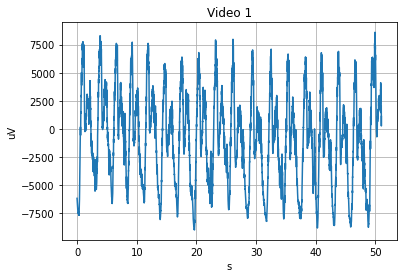

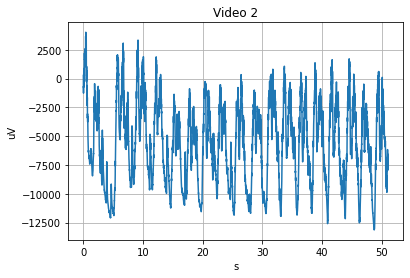

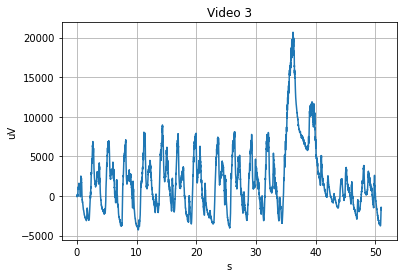

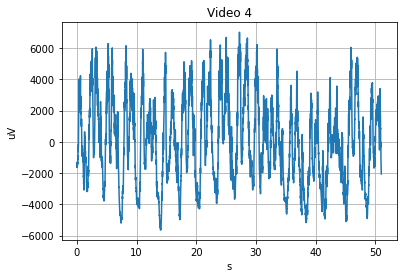

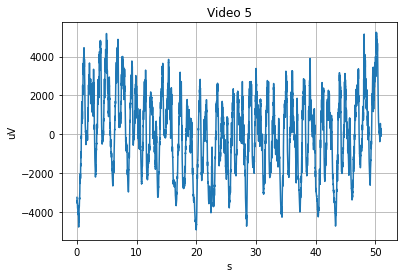

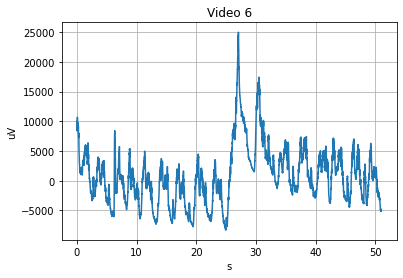

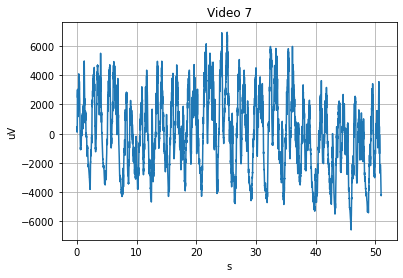

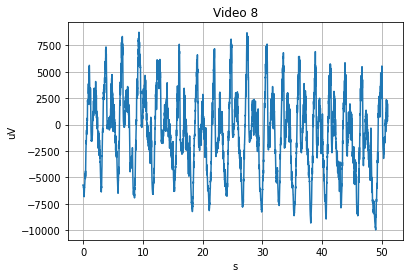

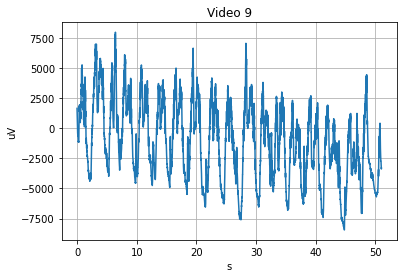

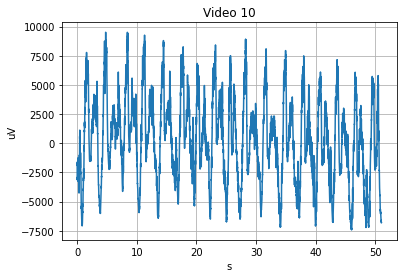

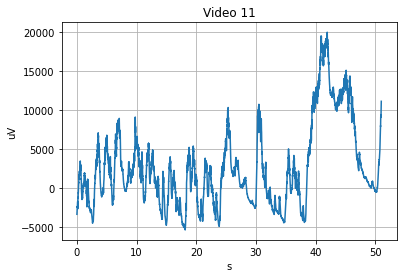

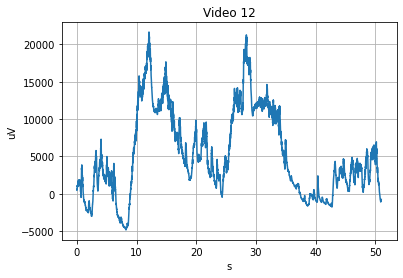

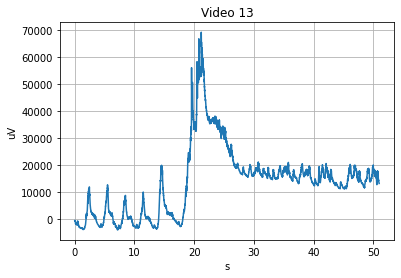

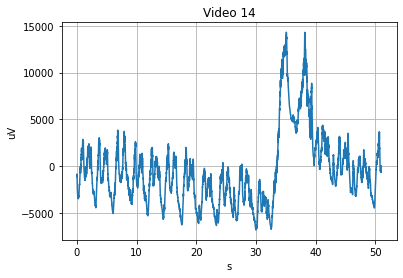

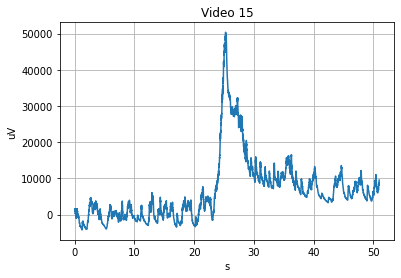

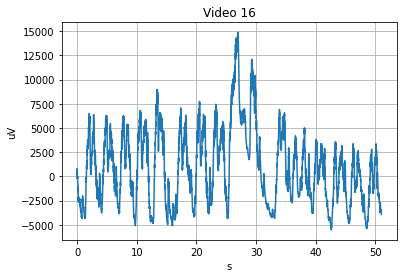

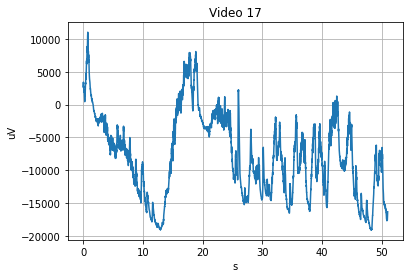

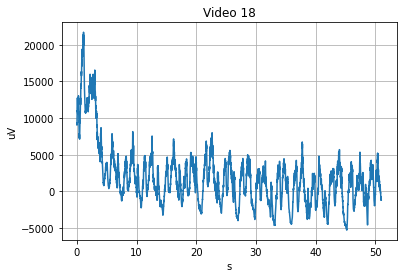

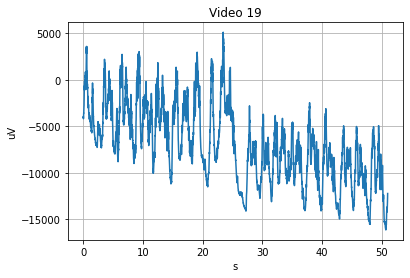

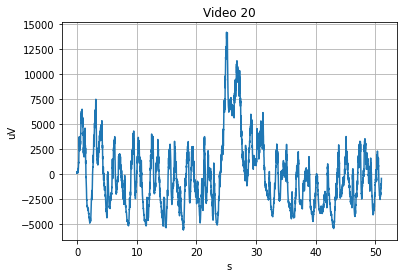

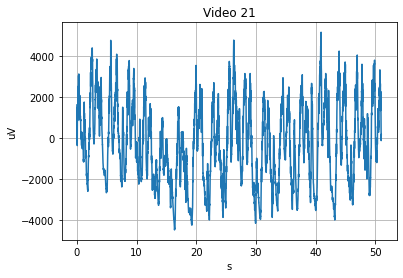

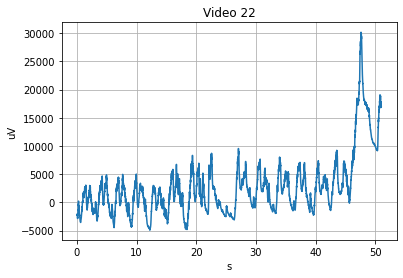

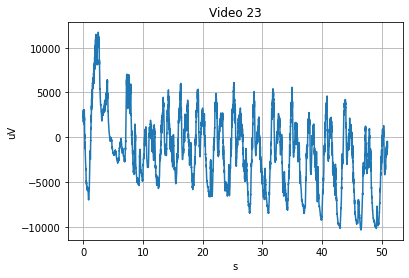

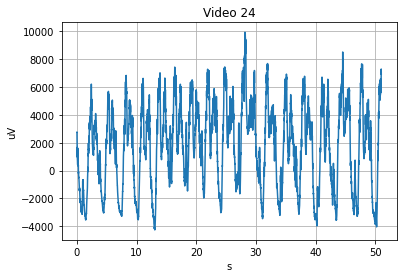

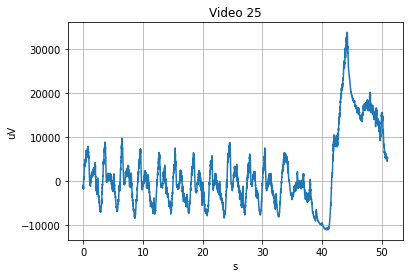

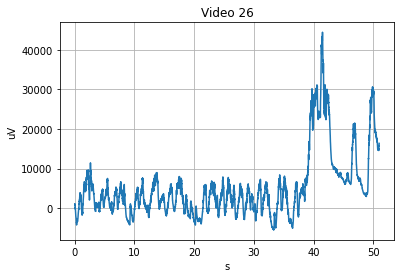

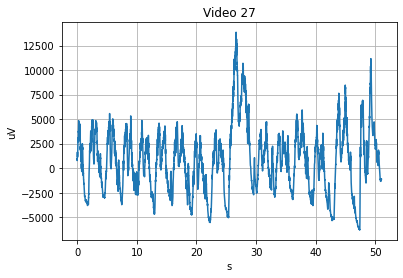

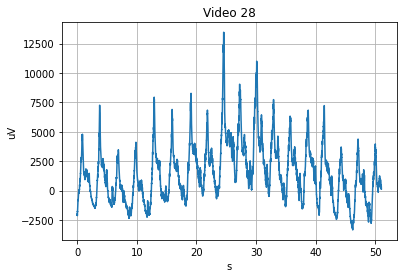

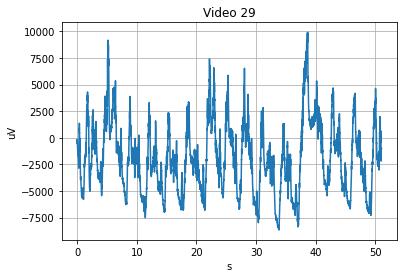

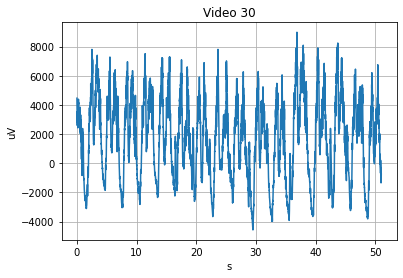

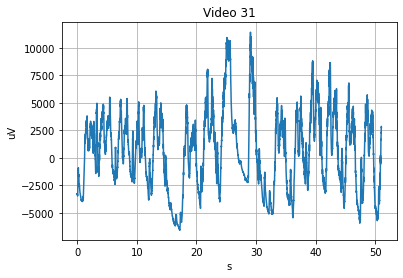

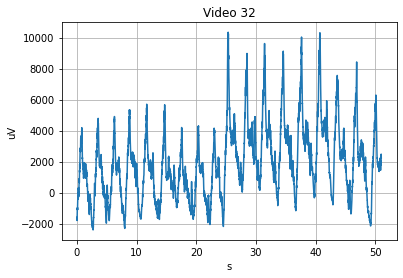

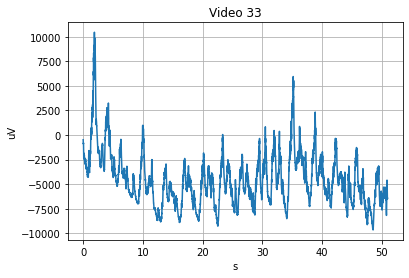

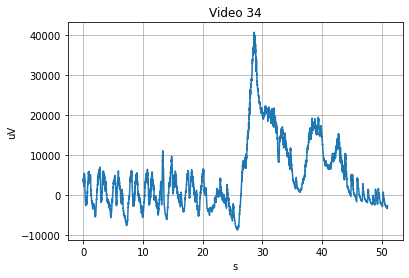

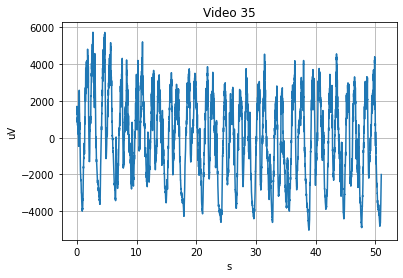

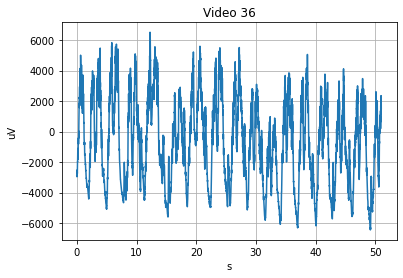

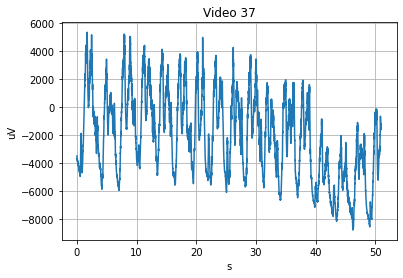

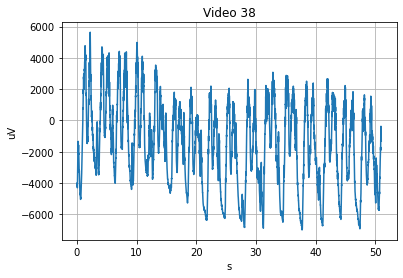

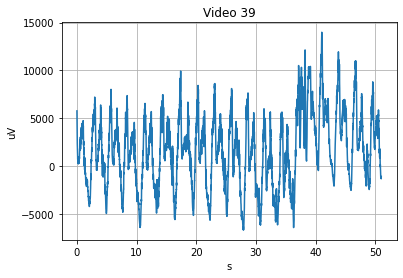

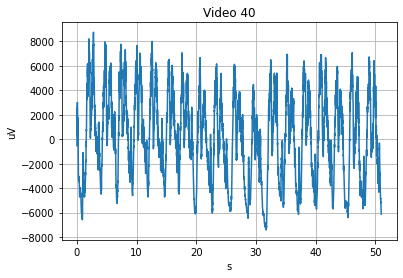

In [17]:
canal_RP=38 #canal de patron de respiración
graficar_señales(canal_RP)

Las caracteristicas más importantes de las señales Respiration pattern son:


*  relación de energía de la banda (diferencia entre el logaritmo de
energía entre la más baja (0,05-0,25Hz) y la más alta (0,25-5Hz).

*  señal de respiración promedio. 

*  media de la derivada (variación de la señal de respiración).

*  desviacion estandar

*  rango o la mayor respiración.

*  ritmo respiratorio (centroide espectral).

*  frecuencia respiratoria.

*  10 de potencia espectral en las bandas de 0 a 2.4Hz. 

*  promedio de pico a pico en el tiempo.

*  mediana pico a pico en el tiempo.


solo vamos a calcular 3 los cuales son: **media de la derivada**, **La desviación estandar**, y **frecuencia respiratoria**.

### 1) media de la derivada.

In [18]:
#definicion de la funcion
def media_Diff(canal):
  mediaDiff_señal=[] #lista para guardar la media de la derivada
  for video in range(40): #ciclo que recorre todos los videos
    señal = X[video,canal-1,:] #variable de la señal 
    mediaDiff_señal.append(np.mean(np.diff(señal)))# calculo de la media de la derivada
  
  return(mediaDiff_señal)

In [19]:
media_Diff(canal_RP)
print('Media de la derivada'+'\n')
for i in range(len(media_Diff(canal_RP))):
  print('Video '+str(i+1)+': '+str(media_Diff(canal_BVP)[i]))

Media de la derivada

Video 1: 1.6599963620224816
Video 2: 1.7383954691608126
Video 3: 1.868113075819081
Video 4: -0.4403965111864056
Video 5: -1.075444240668553
Video 6: 1.6485506908467522
Video 7: 0.17116140947757716
Video 8: -0.11370862867391536
Video 9: 1.4865158949864232
Video 10: -0.6794838646349799
Video 11: -4.506527302595598
Video 12: -0.18447728836175964
Video 13: -0.9045072561159898
Video 14: 1.0976623082449692
Video 15: -3.850234013545429
Video 16: -3.424724355718305
Video 17: 1.379315589137923
Video 18: 0.6536001899499958
Video 19: 0.3896764781331731
Video 20: 0.2441743184155648
Video 21: -0.45618106424574545
Video 22: -0.642977410165986
Video 23: 0.39132226091661115
Video 24: 0.3348419881213443
Video 25: -6.071666729645365
Video 26: 1.8319806628917776
Video 27: 0.23856369529020685
Video 28: -0.13196185590841156
Video 29: 0.5595661463690026
Video 30: 0.701776740519734
Video 31: 3.671068115075675
Video 32: -0.20467553161304722
Video 33: 0.6614550623254976
Video 34: -3.97441

### 2) Desviacion estandar

In [116]:
Desviacion_estandar(canal_RP)
print('Desviacion estandar Respiration pattern'+'\n')
for i in range(len(Desviacion_estandar(canal_RP))):
  print('Video '+str(i+1)+': '+str(int(Desviacion_estandar(canal_RP)[i])))

Desviacion estandar Respiration pattern

Video 1: 4066
Video 2: 3522
Video 3: 4149
Video 4: 2710
Video 5: 2052
Video 6: 4834
Video 7: 2573
Video 8: 3757
Video 9: 3199
Video 10: 3627
Video 11: 5278
Video 12: 5740
Video 13: 12977
Video 14: 3838
Video 15: 8934
Video 16: 3854
Video 17: 6314
Video 18: 4045
Video 19: 4078
Video 20: 3312
Video 21: 1949
Video 22: 5258
Video 23: 4111
Video 24: 2986
Video 25: 8192
Video 26: 8146
Video 27: 3308
Video 28: 2470
Video 29: 3295
Video 30: 2754
Video 31: 3527
Video 32: 2319
Video 33: 2669
Video 34: 8562
Video 35: 2313
Video 36: 2832
Video 37: 3035
Video 38: 2713
Video 39: 3776
Video 40: 3528


### 3) frecuencia respiratoria.

* como se espera la autocorrelacion nos muestra patrones de repeticion de la señal. lo cual deja en claro que hay un cuasiperiodo asociado y por lo tanto una frecuencia fundamental.

* se observa que efecticamente el maximo de la autocorrelacion esta en 0 y luego hay otros que van apareciendo con una distancia similar, necesitamos obtener la distancia entre el maximo en 0 y el segundo, para poder obtener esta distancia es necesario borrar la frecuencia fundamental y una vez borrado podremos encontrar el valor maximo de la autocorrelacion y su distancia al valor maximo en 0.

* La autocorrelación siempre tiene un máximo en cero, es decir, cero retraso. Queremos identificar el máximo fuera del pico centrado en cero. Por lo tanto, podríamos elegir solo buscar dentro de un rango de frecuencias razonables, se hizo la investigacion sobre la frecuencia de la respiracion y debido a que estos maullidos varian mucho en su frecuencia por diversos factores se escogio la frecuencia minima y maxima de 12 y 20 por minuto respectivamente. para profundisar sobre esto se puede remitir a la pagina= http://publicacionesmedicina.uc.cl/ManualSemiologia/190Respiracion.htm#:~:text=frecuencia%20respiratoria%20normal%2C%20en%20adultos,por%20minuto%20(en%20adultos).

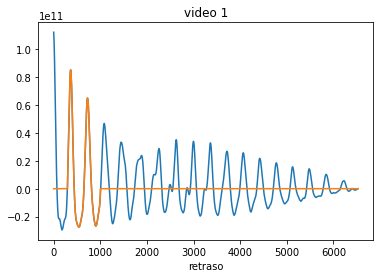

Frecuencia fundamental estimada del audio a identificar: 0.1401098901098901 Hz


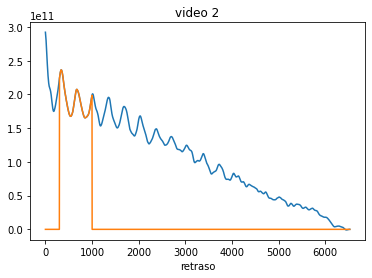

Frecuencia fundamental estimada del audio a identificar: 0.1504424778761062 Hz


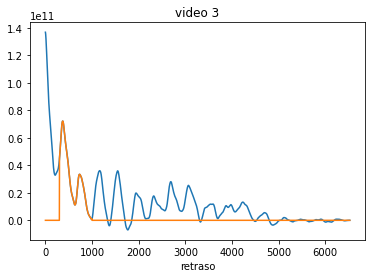

Frecuencia fundamental estimada del audio a identificar: 0.13746630727762804 Hz


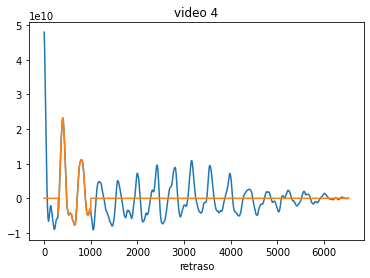

Frecuencia fundamental estimada del audio a identificar: 0.12686567164179105 Hz


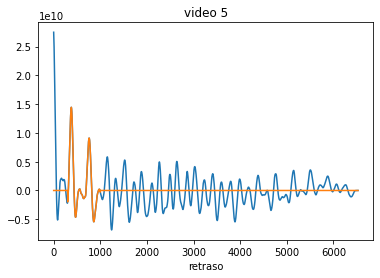

Frecuencia fundamental estimada del audio a identificar: 0.1349206349206349 Hz


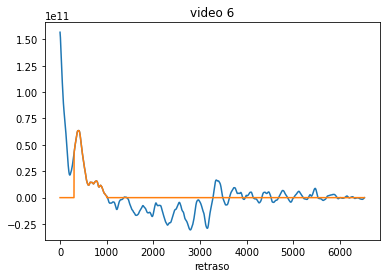

Frecuencia fundamental estimada del audio a identificar: 0.1275 Hz


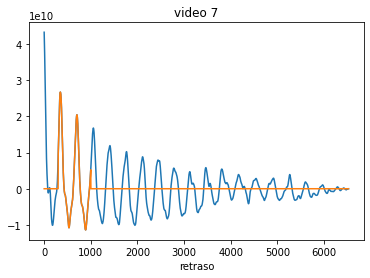

Frecuencia fundamental estimada del audio a identificar: 0.14697406340057637 Hz


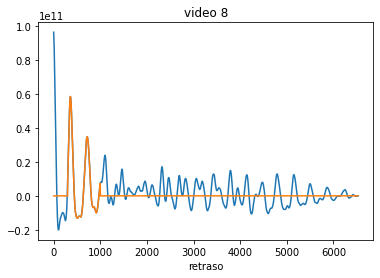

Frecuencia fundamental estimada del audio a identificar: 0.14206128133704735 Hz


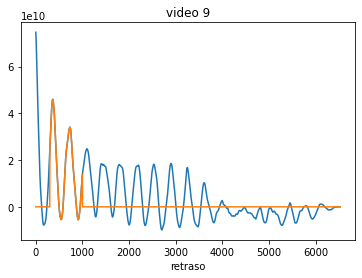

Frecuencia fundamental estimada del audio a identificar: 0.14049586776859505 Hz


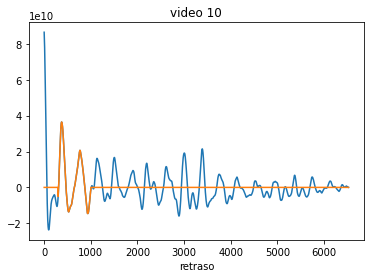

Frecuencia fundamental estimada del audio a identificar: 0.13636363636363635 Hz


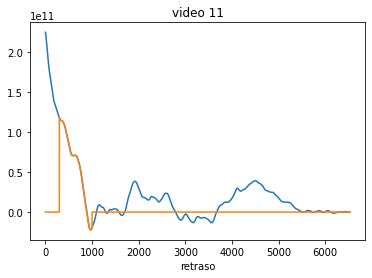

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


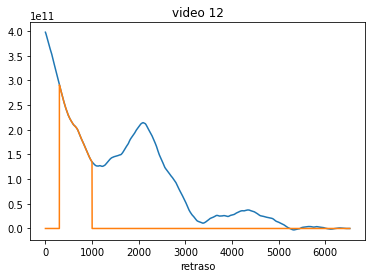

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


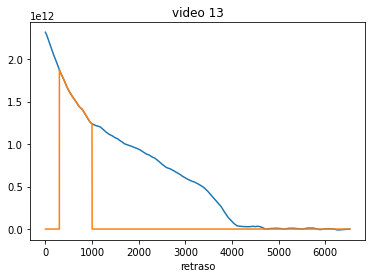

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


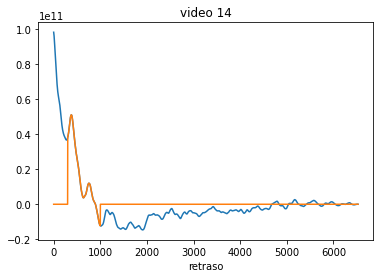

Frecuencia fundamental estimada del audio a identificar: 0.1349206349206349 Hz


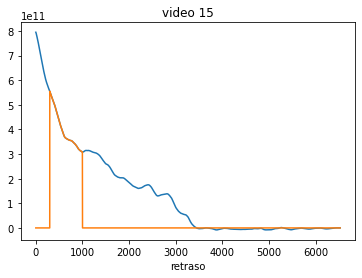

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


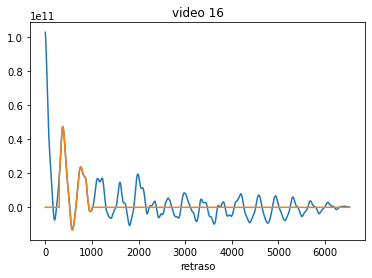

Frecuencia fundamental estimada del audio a identificar: 0.1356382978723404 Hz


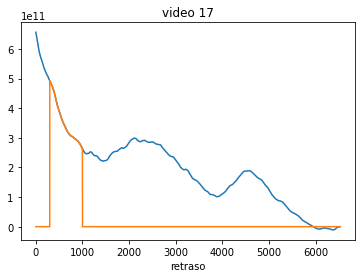

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


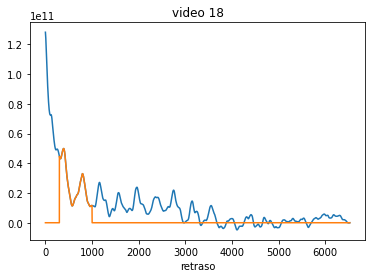

Frecuencia fundamental estimada del audio a identificar: 0.13010204081632654 Hz


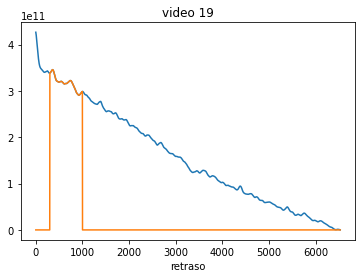

Frecuencia fundamental estimada del audio a identificar: 0.14206128133704735 Hz


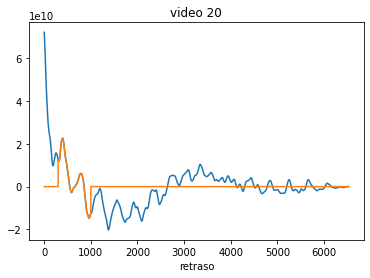

Frecuencia fundamental estimada del audio a identificar: 0.12846347607052896 Hz


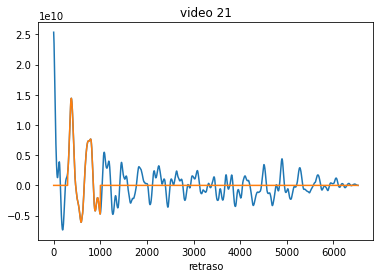

Frecuencia fundamental estimada del audio a identificar: 0.1349206349206349 Hz


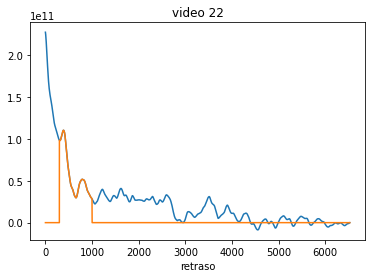

Frecuencia fundamental estimada del audio a identificar: 0.13178294573643412 Hz


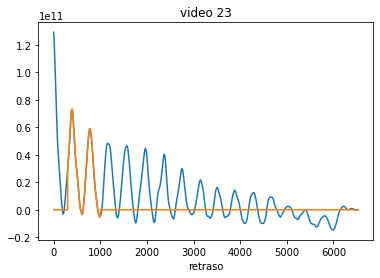

Frecuencia fundamental estimada del audio a identificar: 0.13076923076923078 Hz


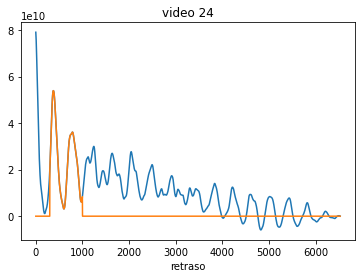

Frecuencia fundamental estimada del audio a identificar: 0.1356382978723404 Hz


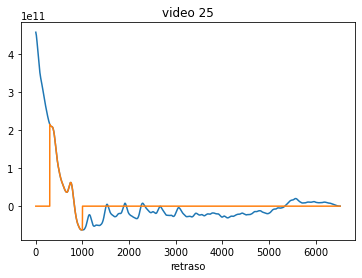

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


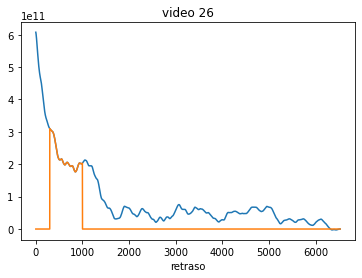

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


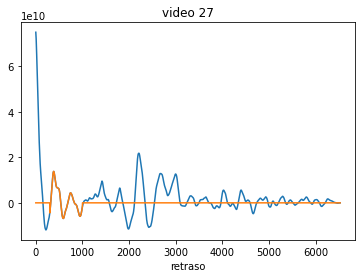

Frecuencia fundamental estimada del audio a identificar: 0.1328125 Hz


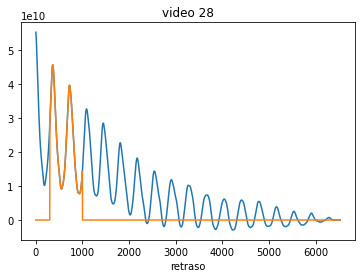

Frecuencia fundamental estimada del audio a identificar: 0.14049586776859505 Hz


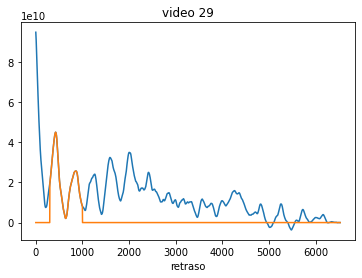

Frecuencia fundamental estimada del audio a identificar: 0.12 Hz


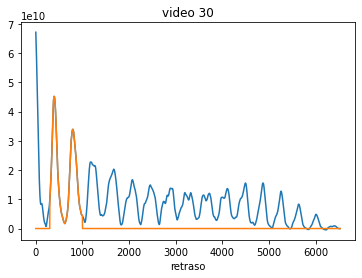

Frecuencia fundamental estimada del audio a identificar: 0.1291139240506329 Hz


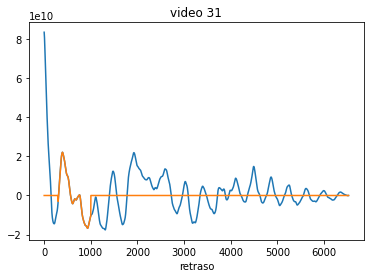

Frecuencia fundamental estimada del audio a identificar: 0.1297709923664122 Hz


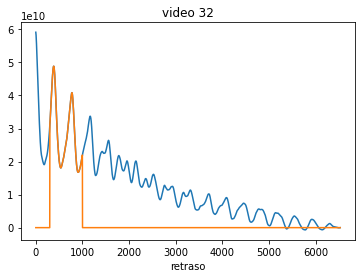

Frecuencia fundamental estimada del audio a identificar: 0.1328125 Hz


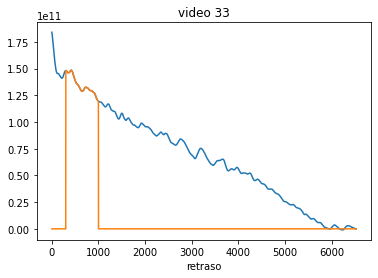

Frecuencia fundamental estimada del audio a identificar: 0.12259615384615384 Hz


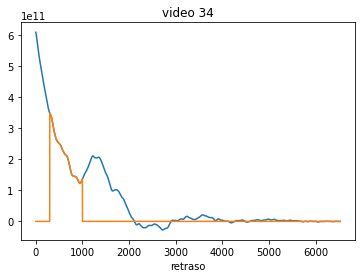

Frecuencia fundamental estimada del audio a identificar: 0.17 Hz


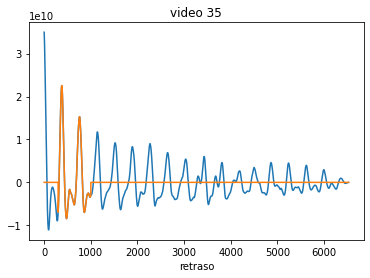

Frecuencia fundamental estimada del audio a identificar: 0.1349206349206349 Hz


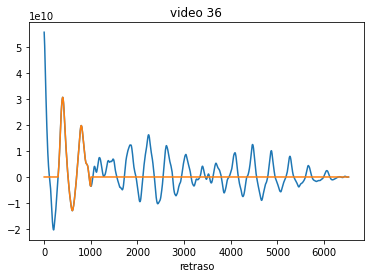

Frecuencia fundamental estimada del audio a identificar: 0.12846347607052896 Hz


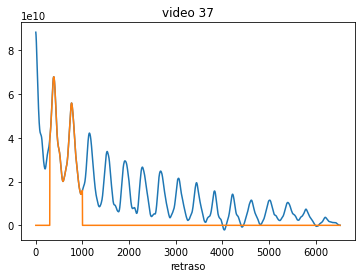

Frecuencia fundamental estimada del audio a identificar: 0.13246753246753246 Hz


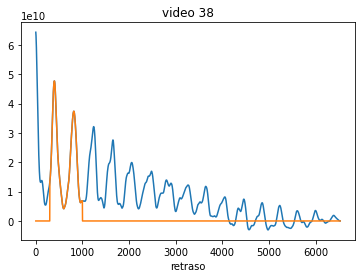

Frecuencia fundamental estimada del audio a identificar: 0.12814070351758794 Hz


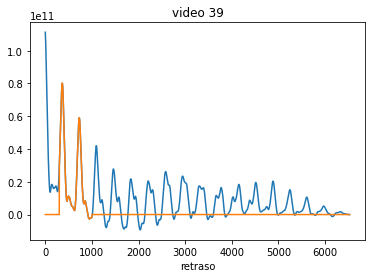

Frecuencia fundamental estimada del audio a identificar: 0.1401098901098901 Hz


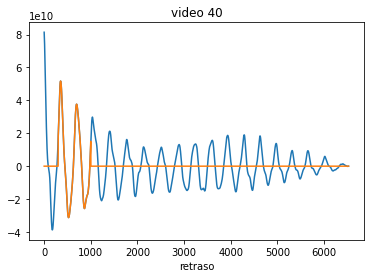

Frecuencia fundamental estimada del audio a identificar: 0.14488636363636365 Hz


In [115]:
#correlacion
for video in range(40):
  RP=X[video,canal_RP-1,:]
  ts = len(RP)/128. #tiempo de muestreo
  correlacion_RP=[]
  correlacion_RP = librosa.autocorrelate(RP) #calculo de la autocorrelacion 

  plt.plot(correlacion_RP)
  plt.title('Correlacion señal RP')
  plt.xlabel('retraso')
  plt.grid()

  #recorte de pico en 0  para audio principal
  f_lowp = 300 #freceucnia baja
  f_highp = 1000 #freceuncia alta
  t_lop = f_highp #tiempo bajo
  t_hip = f_lowp #tiempo alto
  correlacion_RP[:int(f_lowp)] = 0 #cortar la autocorrelacion 
  correlacion_RP[int(f_highp):] = 0 #cortar la autocorrelacion 

  #grafica de las correlaciones sin el lobulo principal.
  plt.plot(correlacion_RP)
  plt.title('video '+str(video+1))
  plt.grid()

  plt.show()

  t_maxp = correlacion_RP.argmax() #tiempo del maximo
  fop=ts/t_maxp #frecuencia fundamental

  print("Frecuencia fundamental estimada del audio a identificar: "+str(fop)+" Hz")

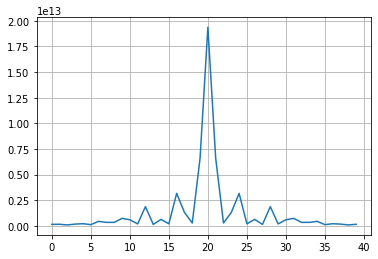

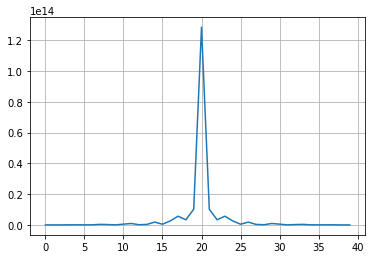

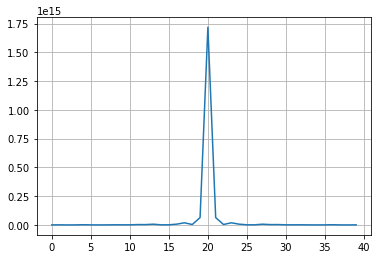

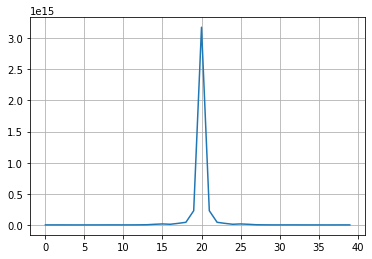

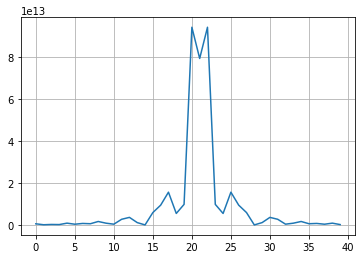

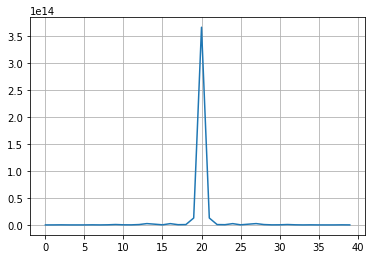

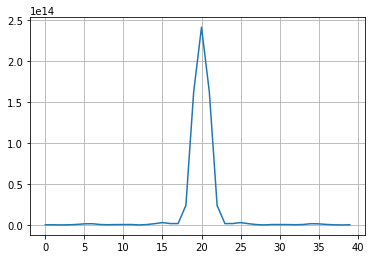

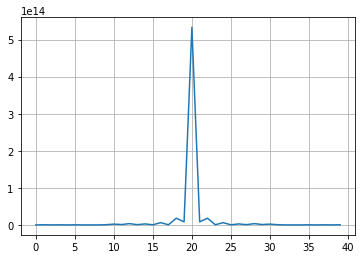

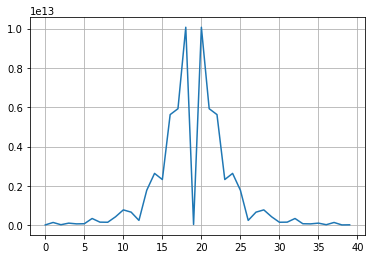

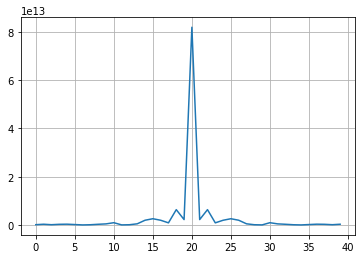

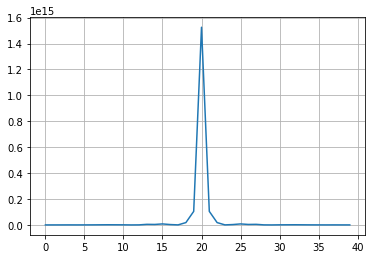

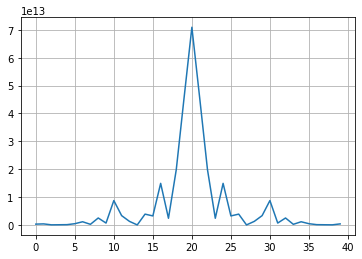

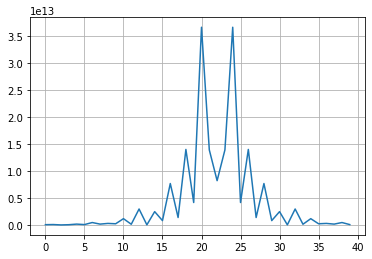

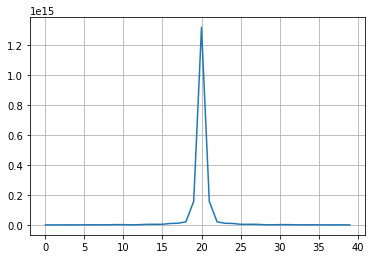

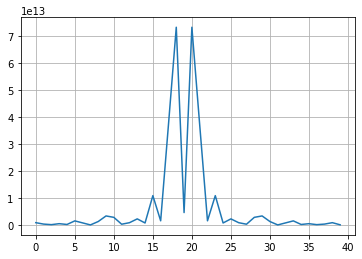

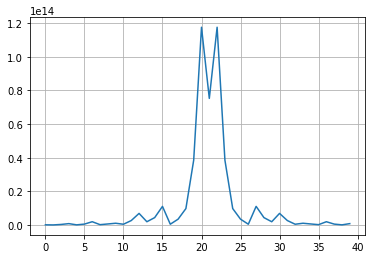

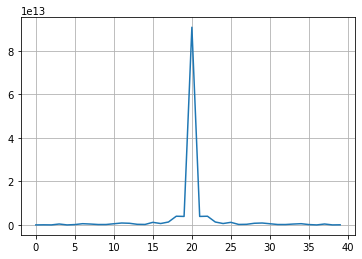

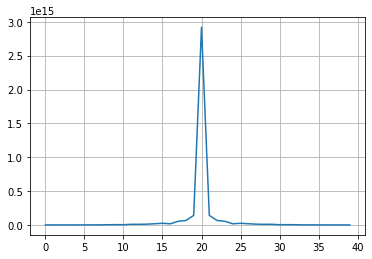

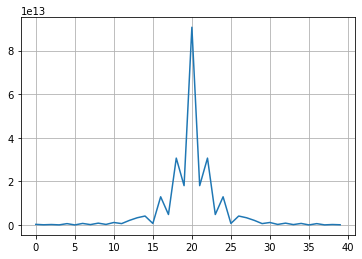

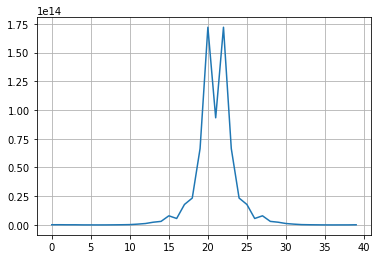

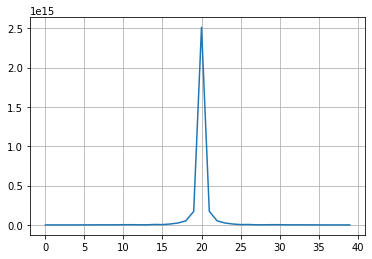

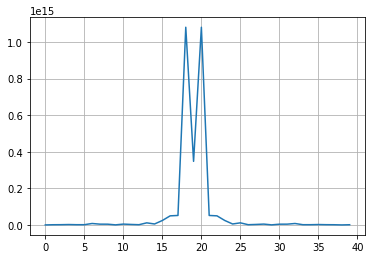

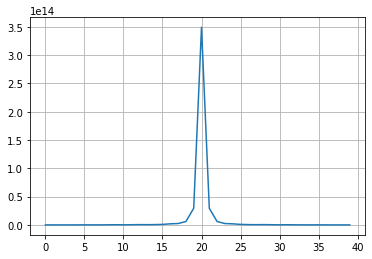

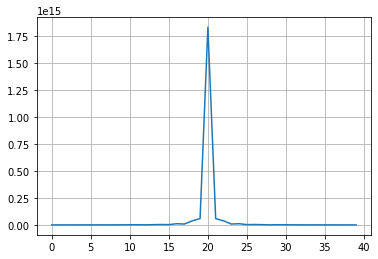

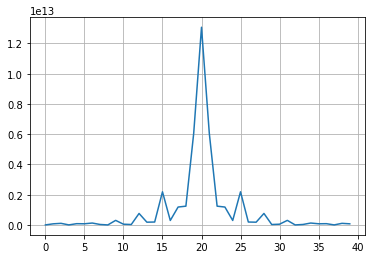

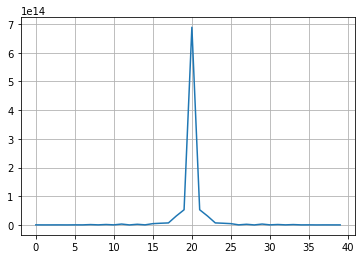

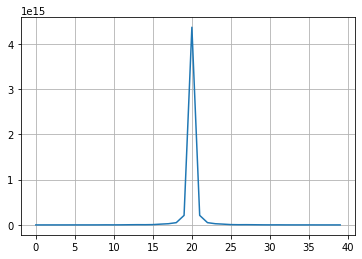

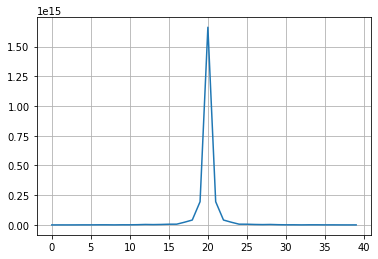

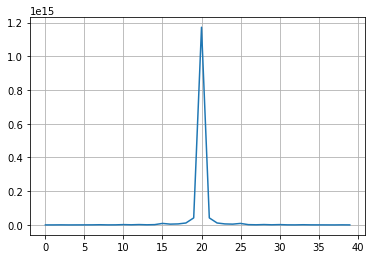

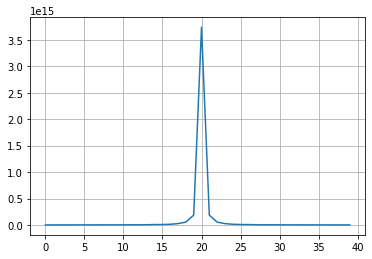

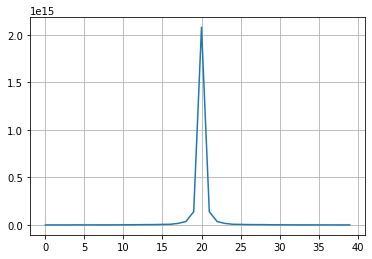

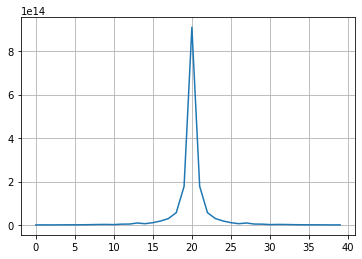

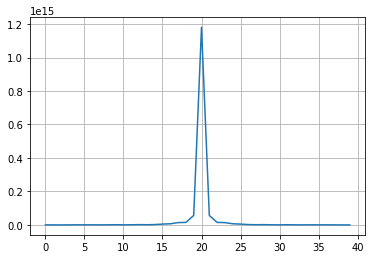

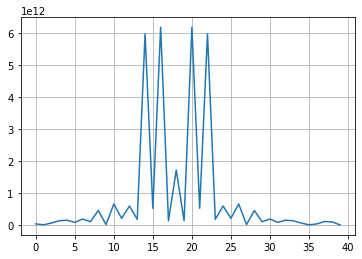

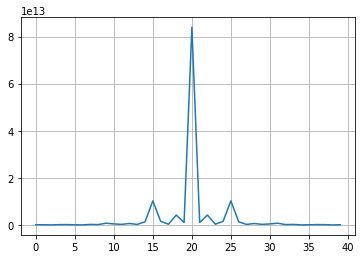

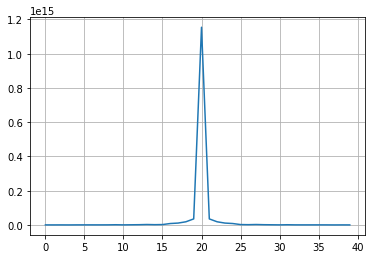

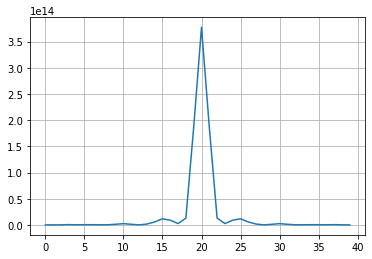

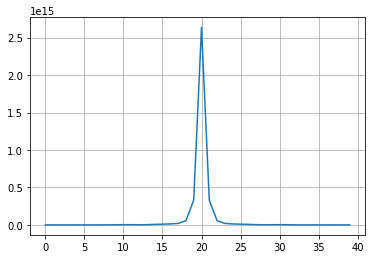

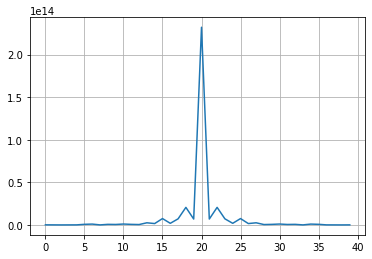

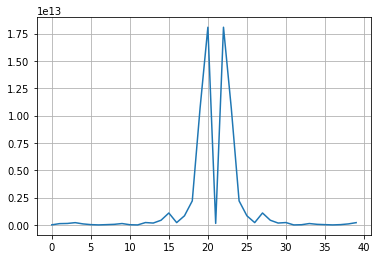

In [22]:
#densidad espectral de potencia
for video in range(40):
  GSR = X[video,canal_GSR-1,:] #le resto uno al canal porque python crea listas con la primera ubicacion igual a 0
  N=len(GSR)
  DEP = np.abs(np.fft.fft(GSR))**2 #densidad espectral de potencia
  DEP_Centrada=np.concatenate((DEP[((N//2)):],DEP[:((N//2))])) #hacer simetrica el espectro
  z=20 #zoom
  max=np.max(DEP_Centrada) #valor maximo
  F_central=np.where(DEP_Centrada==max) #encontrar la ubcacion del valor maximo

  plt.plot(DEP_Centrada[int(F_central[0][0]-z):int(F_central[0][0]+z)]) 
  plt.grid()
  plt.show()
